# Trend indicator MAs
Now let's learn about technical indicators!

# What are technical indicators?
A technical indicator is a calculation based on historical market data, such as price, volumes, etc. They are essential to technical analysis, which assumes that the market is efficient and prices have incorporated all public information such as financial news or public policies. Traders use technical indicators to gain insight into past price patterns and to anticipate possible future price movements.

## Types of indicators
There are mainly three types of indicators. 

* **Trend indicators**, such as Moving Average, Average Directional Movement Index, measure the direction or strength of a trend. 
* **Momentum indicators**, such as Relative Strength Index, measure the velocity of price movement, that is the rate of change in an upward or downward direction. 
* **Volatility indicators**, such as Bollinger Bands, measure the magnitude of price deviations.

## The TA-Lib package
We will use the TA Lib package to implement technical indicators in Python. TA Lib, which stands for Technical Analysis Library, includes over 150 indicators and is very popular among technical traders. To import the package, use import talib.

******************************************************
*Installing TA-Lib was unconventional.*

conda install -c quantopian ta-lib **did not work**.

*Step-by-step shared here:*

https://blog.quantinsti.com/install-ta-lib-python/#windows
**************************

In [1]:
import os
import pandas as pd

# importing dataset from GitHub
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/alimirr/algorithmic_trading_in_python/main/"
BITCOIN_PATH = os.path.join("datasets", "bitcoin_data")
BITCOIN_URL = DOWNLOAD_ROOT + "datasets/bitcoin_data.csv"

def load_bitcoin_data(bitcoin_url = BITCOIN_URL, bitcoin_path=BITCOIN_PATH):
    csv_path = os.path.join(bitcoin_path,"bitcoin_data.csv")
    # Load data
    # "Date" column is passed as index and parsed index as data/time format
    return pd.read_csv(bitcoin_url, error_bad_lines=False, index_col = 'Date', parse_dates = True)

In [2]:
import talib # library to implement technical indicators
import bt    # backtest library to download data

# downloading dataset
bitcoin_data = load_bitcoin_data()
stock_data = bitcoin_data.iloc[:250,]
stock_data.head()

,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
Date,,,,,,,
2020-04-10,BTCUSD,7315.25,7315.25,7315.25,7315.25,0.00,0.00
2020-04-09,BTCUSD,7369.60,7378.85,7115.04,7315.25,2237.13,16310014.53
2020-04-08,BTCUSD,7201.81,7432.23,7152.80,7369.60,2483.60,18138080.27
2020-04-07,BTCUSD,7336.96,7468.42,7078.00,7201.81,2333.34,17047120.32
2020-04-06,BTCUSD,6775.21,7369.76,6771.01,7336.96,3727.47,26533750.17


## Moving average indicators
Let's start with the most commonly used trend indicators: **Simple Moving average (SMA)** and **Exponential Moving Average (EMA)**. They are called "moving" averages because every average value is calculated using data points of the most recent n periods, and hence moves along with the price. Calculating the averages creates a smoothing effect which helps to give a clearer indication of which direction the price is moving - upward, downward, or sideways. Moving averages calculated based on a longer lookback period have more smoothing effects than a shorter one.

## Simple Moving Average (SMA)
An SMA is the arithmetic mean of the past n prices. N is a chosen number of periods for calculating the mean. Earlier, we calculated SMA with the dot rolling dot mean method of a DataFrame. With talib, we can simply call talib dot SMA and pass the DataFrame column, in this case the Close price. Use the timeperiod parameter to specify the averaging period. Note since an n-period SMA needs at least n data points to calculate the first average value, we will get NA values for the first n minus 1 rows. Instead, we can use the tail method to check the last 5 rows.



************
$
\begin{equation*}
SMA = (P_{1} + P_{2} + ... + P_{n})/n
\end{equation*}
$
************
<i><b>P</b> = price <br> <b>n</b> = window size</i>
 ************

In [3]:
stock_data['SMA_short'] = talib.SMA(stock_data["Close"], timeperiod=10)
stock_data['SMA_long'] = talib.SMA(stock_data["Close"], timeperiod=50)

%matplotlib inline
import matplotlib.pyplot as plt

<ipython-input-3-3306bc6dea52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_short'] = talib.SMA(stock_data["Close"], timeperiod=10)
<ipython-input-3-3306bc6dea52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_long'] = talib.SMA(stock_data["Close"], timeperiod=50)


## Plotting the SMA
We can plot SMAs together with the price with matplotlib. The label is added to indicate each data series. The blue line is the SMA calculated with a shorter lookback period, and it traces the price movement closely. The red line is the SMA calculated with a longer lookback period, and is smoother and less responsive to the price fluctuations.

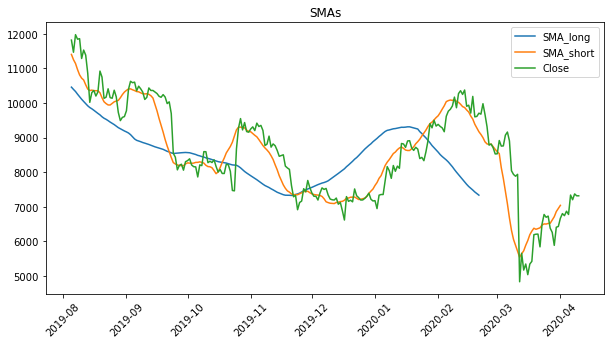

In [4]:
# plotting SMAs
plt.figure(figsize=(10,5))

plt.plot(stock_data['SMA_long'], label="SMA_long")
plt.plot(stock_data['SMA_short'], label="SMA_short")
plt.plot(stock_data['Close'], label="Close")
plt.xticks(rotation=45)
plt.legend()
plt.title("SMAs")
plt.show()

## Exponential Moving Average (EMA)
Another popular type of moving average is the exponential moving average, or EMA. An EMA is an exponentially weighted average of the last n prices, where the weight decreases exponentially with each previous price. 

To implement an EMA with talib, call talib.EMA() and pass the DataFrame column as input, in this case the Close price. Similarly, specify the averaging period with the timeperiod parameter.

************
$
\begin{equation*}
EMA_{n} = (P_{n} * multiplier) + (previous EMA * (1-multiplier))
\end{equation*}
$
************
<i><b>P</b> = price <br> <b>n</b> = window size</i><br>
$
multiplier = \frac{2}{(n+1)}
$
************

In [5]:
# Setting up EMAs
stock_data['EMA_short'] = talib.EMA(stock_data["Close"], timeperiod=10)
stock_data['EMA_long'] = talib.EMA(stock_data["Close"], timeperiod=50)

<ipython-input-5-b065b34a1a0d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['EMA_short'] = talib.EMA(stock_data["Close"], timeperiod=10)
<ipython-input-5-b065b34a1a0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['EMA_long'] = talib.EMA(stock_data["Close"], timeperiod=50)


## Plotting the EMA

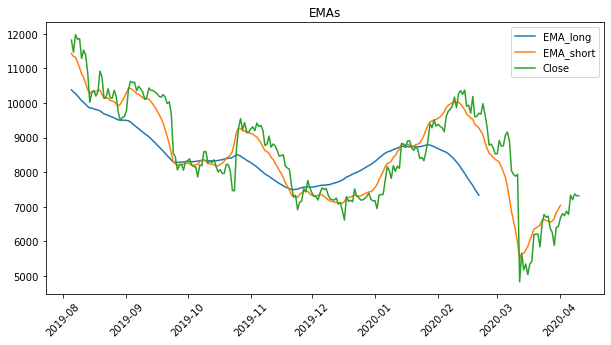

In [6]:
plt.figure(figsize=(10,5))
plt.plot(stock_data["EMA_long"], label='EMA_long')
plt.plot(stock_data["EMA_short"], label='EMA_short')
plt.plot(stock_data["Close"], label='Close')

plt.legend()
plt.title('EMAs')
plt.xticks(rotation=45)
plt.show()

## SMA vs. EMA
The main difference between SMAs and EMAs is that EMAs give higher weight to the more recent data, while SMAs assign equal weight to all data points. As shown in the plot containing EMA and SMA (calculated with the same lookback window), whenever the price makes a big change, the **EMA in the orange line is more sensitive to the price** move compared to the SMA in the blue line.

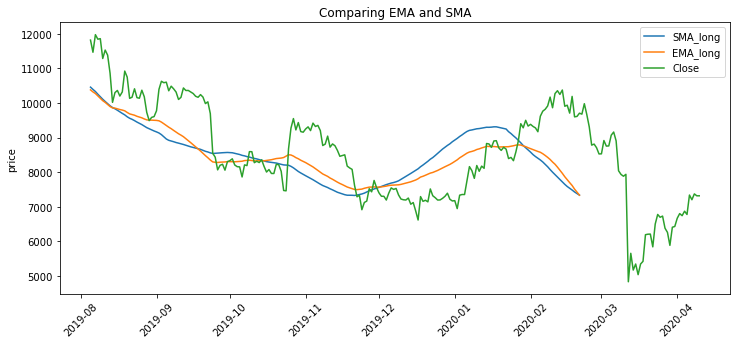

In [16]:
# plotting SMAs
plt.figure(figsize=(12,5))
plt.plot(stock_data['SMA_long'], label="SMA_long")
plt.plot(stock_data["EMA_long"], label='EMA_long')
plt.plot(stock_data['Close'], label="Close")
plt.ylabel('price')
plt.xticks(rotation=45)

plt.legend()
plt.title("Comparing EMA and SMA")
plt.show()

1. Strength indicator: ADX
In this lesson, we will learn about a popular trend strength indicator called Average Directional Movement Index or ADX.

2. What is ADX?
ADX stands for "Average Directional Movement Index". It was developed by J. Welles Wilder, who elaborated the concept in his famous book "New Concepts in Technical Systems". Wilder created ADX with the intention to measure the strength of a trend objectively. ADX can indicate whether an asset price is trending or merely moving sideways. However, it does not tell the direction of a trend, that is bullish (rising prices) or bearish (falling prices). ADX oscillates between 0 and 100. In general, an ADX less than 25 indicates the market is going sideways and has no clear trend. An ADX above 25 indicates the market is trending, and an ADX above 50 suggests a strong trending market.

3. How is ADX calculated?
ADX is obtained using lengthy and complicated calculations. Simply put, ADX is derived from two other indicators: plus DI and minus DI. The plus DI, or plus directional index, quantifies the presence of an uptrend; and the minus DI, or minus directional index, quantifies the presence of a downtrend. ADX is the smoothed averages of the difference between plus DI and minus DI. The calculation input for ADX includes the high, low and close prices of each period.

4. Implementing ADX in Python
ADX can be implemented in Python by calling talib dot ADX, and passing three types of price data as input, the high, low and close price. Originally Welles Wilder used a 14-period lookback window for ADX calculations, which became the industry standard. You can change the default period with the timeperiod parameter. Keep in mind, the longer the lookback window, the less sensitive the ADX is to the price fluctuations. In other words, a 14-day ADX is more sensitive to daily price changes than a 21-day ADX. Sometimes traders change the lookback period to suit their trading time horizons. For example, a position trader who holds a trading position for several months would likely use a longer lookback period. In this sample code, we calculate ADX and save it in a new DataFrame column. We can use dot tail to check the last 5 rows.

# Strength indicator: ADX (Average Directional Movement Index)

## What is ADX?
ADX stands for "Average Directional Movement Index". It was developed by J. Welles Wilder, who elaborated the concept in his famous book "New Concepts in Technical Systems". Wilder created ADX with the intention **to measure the strength of a trend objectively**. 

ADX can indicate whether an asset price is trending or merely moving sideways. However, it does not tell the direction of a trend, that is bullish (rising prices) or bearish (falling prices). **ADX oscillates between 0 and 100**. 

In general: 
* **ADX < 25** indicates the market is going **sideways** and has no clear trend. 
* **ADX > 25** indicates the market is **trending**, and an 
* **ADX > 50** suggests a **strong trending market**.

## How is ADX calculated?
ADX is obtained using lengthy and complicated calculations. 

Simply put, ADX is derived from two other indicators: 

><b>+DI and -DI</b>

* The **+DI**, or plus directional index, quantifies the **presence of an uptrend.**
* the **-DI**, or minus directional index, quantifies the **presence of a downtrend.** 

ADX is the smoothed averages of the difference between plus DI and minus DI. The calculation input for ADX includes the high, low and close prices of each period.

## Implementing ADX in Python
ADX can be implemented in Python by calling **talib.ADX()**, and passing three types of price data as input, the high, low and close price. 

Originally Welles Wilder used a 14-period lookback window for ADX calculations, which became the industry standard. You can change the default period with the timeperiod parameter. Keep in mind, **the longer the lookback window, the less sensitive the ADX is to the price fluctuations**. In other words, a 14-day ADX is more sensitive to daily price changes than a 21-day ADX. Sometimes traders change the lookback period to suit their trading time horizons. 

For example, a position trader who holds a **trading position for several months** would likely use a **longer lookback period**. 

In this sample code, we calculate ADX and save it in a new DataFrame column. We can use .tail() to check the last 5 rows.

In [17]:
stock_data['ADX'] = talib.ADX(stock_data["High"], 
                              stock_data["Low"],
                              stock_data["Close"],
                              timeperiod=14)
stock_data.tail()

<ipython-input-17-0b1ae3ac305e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['ADX'] = talib.ADX(stock_data["High"],


,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,SMA_short,SMA_long,EMA_short,EMA_long,ADX
Date,,,,,,,,,,,,
2019-08-09,BTCUSD,11843.87,11961.74,11653.87,11857.08,1530.48,18065379.11,10809.936,10178.7914,11022.102849,10134.951376,16.543359
2019-08-08,BTCUSD,11972.53,12018.99,11468.19,11841.61,1226.61,14347239.78,10962.300,10251.6836,11171.104149,10201.879165,16.598230
2019-08-07,BTCUSD,11464.34,12141.68,11390.14,11972.53,3583.16,42034544.56,11139.669,10329.8322,11316.817940,10271.316453,16.890490
2019-08-06,BTCUSD,11815.28,12321.01,11205.72,11464.34,3586.66,42115688.50,11250.081,10390.4810,11343.640133,10318.101690,16.627101
2019-08-05,BTCUSD,10975.00,11950.00,10975.00,11815.28,2362.19,27509110.08,11401.823,10455.9194,11429.392836,10376.814565,15.758849


## Plotting ADX
Usually, an ADX plot is placed horizontally under a price plot, so we can observe the price and indicator changes together along the same timeline. This can be accomplished by using the matplotlib subplots function. In this sample code, we create a set of subplots, ax1 and ax2, to plot the price and ADX separately. We can also use set underscore ylabel to label the y axis of each subplot for more clarity. Notice in the chart, the ADX starts to rise when the price is steadily trending up. The ADX starts to decline when the uptrend in price is stalling and price is moving sideways.

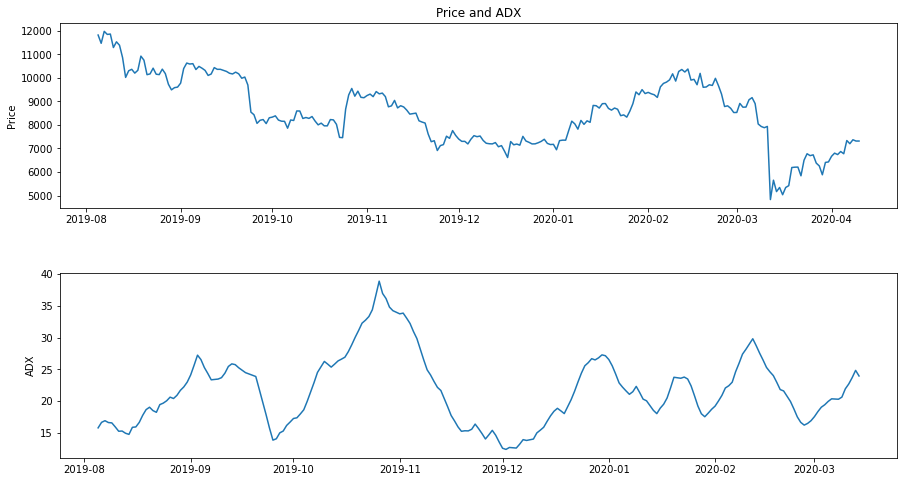

In [43]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2)

# setting size of subplots
fig.set_figheight(8)
fig.set_figwidth(15)

# spacing out the subplots
fig.subplots_adjust(hspace=.35)

# Plot price
ax1.set_ylabel('Price')
ax1.plot(stock_data["Close"])

# Plot ADX
ax2.set_ylabel("ADX")
ax2.plot(stock_data["ADX"])

ax1.set_title("Price and ADX")
plt.show()

In [27]:
ax1_ticks

[Text(18109.0, 0, '2019-08'),
 Text(18140.0, 0, '2019-09'),
 Text(18170.0, 0, '2019-10'),
 Text(18201.0, 0, '2019-11'),
 Text(18231.0, 0, '2019-12'),
 Text(18262.0, 0, '2020-01'),
 Text(18293.0, 0, '2020-02'),
 Text(18322.0, 0, '2020-03'),
 Text(18353.0, 0, '2020-04')]

# Momentum indicator: RSI (Relative Strength Index)

## What is RSI?
RSI stands for Relative Strength Index. It was also developed by Welles Wilder. RSI has been the most popular indicator used to measure momentum, which is the **speed of rising or falling in prices**. The RSI oscillates between 0 and 100. Traditionally: 

* **RSI > 70** indicates an overbought market condition, which means the asset is overvalued and the price may reverse. 
* **RSI < 30** suggests an oversold market condition, which means the asset is undervalued and the price may rally.

## How is RSI calculated?
The RSI calculation follows a straightforward formula. 

RS, or Relative Strength, is the average of the upward price changes over a chosen n periods, divided by the average of downward price changes over those n periods. 

The formula is constructed in such a way that an RSI is bounded between 0 and 100.

************
$
\begin{equation*}
RSI = 100 - \frac{100}{(1+RS)}
\end{equation*}
$
************
$
\begin{equation*}
RS (Relative Strength) = \frac{Ave. of upward price changes}{Ave. of downward price changes}
\end{equation*}
$
************

## Implementing RSI in Python
RSI can be implemented in Python by calling talib.RSI() and passing the price column. 

Similar to the ADX, Welles Wilder used a 14-period lookback window for RSI calculations, which became the industry standard. You can change the default period with the timeperiod parameter. Note the longer the lookback window, the less sensitive the RSI is to the price fluctuations. Traders may want to change the default time period to suit their specific trading time horizons, or as a variable input for testing different trading strategies. 

In this sample code, we calculated the RSI and saved it in a new DataFrame column. We can use dot tail to check the last 5 rows.

In [59]:
# Calculate RSI
stock_data["RSI"] = talib.RSI(stock_data["Close"], timeperiod=14)

stock_data.tail()

<ipython-input-59-faa8eee5ed22>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data["RSI"] = talib.RSI(stock_data["Close"], timeperiod=14)


,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,SMA_short,SMA_long,EMA_short,EMA_long,ADX,RSI
Date,,,,,,,,,,,,,
2019-08-09,BTCUSD,11843.87,11961.74,11653.87,11857.08,1530.48,18065379.11,10809.936,10178.7914,11022.102849,10134.951376,16.543359,67.549368
2019-08-08,BTCUSD,11972.53,12018.99,11468.19,11841.61,1226.61,14347239.78,10962.300,10251.6836,11171.104149,10201.879165,16.598230,67.271805
2019-08-07,BTCUSD,11464.34,12141.68,11390.14,11972.53,3583.16,42034544.56,11139.669,10329.8322,11316.817940,10271.316453,16.890490,68.453202
2019-08-06,BTCUSD,11815.28,12321.01,11205.72,11464.34,3586.66,42115688.50,11250.081,10390.4810,11343.640133,10318.101690,16.627101,59.478164
2019-08-05,BTCUSD,10975.00,11950.00,10975.00,11815.28,2362.19,27509110.08,11401.823,10455.9194,11429.392836,10376.814565,15.758849,63.078276


## Plotting RSI
Similar to the ADX, it is helpful to plot the price and the RSI one above another. In this sample code, we created two subplots, the top plot shows the price, and the bottom plot shows the RSI. 

Notice in the chart, when the RSI is falling near 30, the price bottoms out and gradually recovers, and when the RSI value is approaching 70, the price reaches new highs and is more likely to pull back.

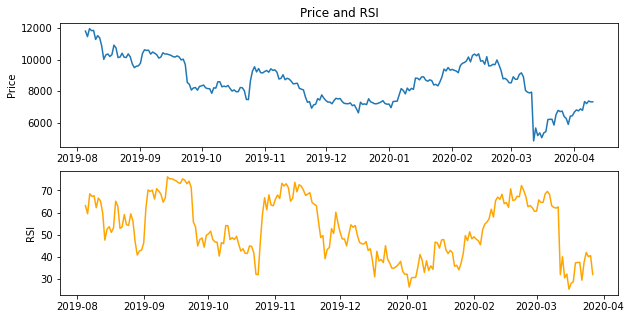

In [60]:
# Create plots
fig, (ax1, ax2) = plt.subplots(2)

fig.set_figheight(5)
fig.set_figwidth(10)

# Plot RSI against price

ax1.set_ylabel("Price")
ax1.plot(stock_data["Close"])

ax2.set_ylabel("RSI")
ax2.plot(stock_data["RSI"], color='orange')

# misc.
ax1.set_title("Price and RSI")

plt.show()

# Volatility indicator: Bollinger Bands

## What are Bollinger Bands?
Bollinger Bands are developed by John Bollinger, a famous technical trader who elaborated on the concept in his book "Bollinger on Bollinger Bands". 

Bollinger bands are designed to **gauge price volatility**, that is, price deviations from the mean. Bollinger Bands are composed of three lines: 

* a middle band which is an n-period simple moving average line, where n equals 20 by default;  
* and an upper and lower band that are drawn k standard deviations above and below the middle band, where k equals 2 by default. 

The parameters **n** and **k** can be changed. Traders may choose the n and k to suit their trading time horizons and strategy needs. For example, a trader may choose 10-period moving average and 1 point 5 standard deviations for a shorter-term strategy, or a 50-period moving average and 2 point 5 standard deviations for a longer-term strategy.

## Bollinger Bands implications
Since the upper and lower bands are calculated based on standard deviations from the mean price, they adjust to volatility swings in the underlying price. The wider the Bollinger Bands, the more volatile the asset prices. In addition, Bollinger Bands intend to answer the question: is the price too high or too low on a relative basis? Statistically speaking, if the upper and lower bands are based on 1 standard deviation, they contain about 68% of the recent price moves. Similarly, if the bands are based on 2 standard deviations, they contain about 95% of recent price moves. In other words, the price only moves out of the upper or lower bands in 5% of the cases. Hence, we can say the price is relatively expensive when it is close to the upper band, and relatively cheap when it is close to the lower band.

## Implementing Bollinger Bands in Python
Bollinger Bands can be implemented in Python by calling talib dot BBANDS and passing the DataFrame column, in this case, the Close price. Specify the lookback period with the timeperiod parameter, which is 20 by default. Also, use nbdevup and nbdevdn to specify the number of standard deviations away from the middle band for the upper and lower band respectively, which is 2 by default. It produces three output Series, which are, respectively, the upper band, the middle moving average line, and the lower band. They can be saved in separate variables.

## Plotting Bollinger Bands
Bollinger Bands are commonly plotted on top of the price as this code demonstrates. As we can see, the Bollinger Bands become wider when the price has big upward or downward swings. When the green price data gets closer to the red upper or red lower band, it tends to reverse temporarily before continuing the original upward or downward movement.